
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
Observations and Insights

Scatter plots were generated to showcase relationships among:
    Temperature (F) vs. Latitude
    Humidity (%) vs. Latitude
    Cloudiness (%) vs. Latitude
    Wind Speed (mph) vs. Latitude

I ran linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Of the four, only Latitude vs. Temperature had any moderate to strong correlations. Temperature noticibly increased the closer we came towards the equator (latitude = 0), and peaked at a latitude of 20o, as compared to the equator i.e. 0. This could be due to limited sample size. However, no other correlations were observed.

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import requests
from citipy import citipy 
from api_keys import weather_api_key, g_key
import time
from pprint import pprint
from random import uniform
import numpy as np

## Generate Cities List

In [10]:
cities=[]

In [11]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
count=0
while(count<=1500):
    long = round(uniform(-180,180), 3) #longitude ranges from -180 to 180, as shown in given figure
    lat = round(uniform(-90, 90), 3) #latitude ranges likewise
    #feed into citipy the lat, long coordinates to return as city object
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    city_entry = f"{city_name},{country_code}"
    if city_entry not in cities:
        cities.append(city_entry)
        print(f"city generated: {city_entry}")

        
    count+=1

city generated: kurumkan,ru
city generated: jamestown,sh
city generated: puerto ayora,ec
city generated: tuktoyaktuk,ca
city generated: sakakah,sa
city generated: anadyr,ru
city generated: illoqqortoormiut,gl
city generated: mahebourg,mu
city generated: marrakesh,ma
city generated: butaritari,ki
city generated: lisakovsk,kz
city generated: lagoa,pt
city generated: castro,cl
city generated: taolanaro,mg
city generated: rikitea,pf
city generated: hobart,au
city generated: thompson,ca
city generated: barentsburg,sj
city generated: bethel,us
city generated: barrow,us
city generated: itoman,jp
city generated: buin,pg
city generated: ushuaia,ar
city generated: sentyabrskiy,ru
city generated: sechura,pe
city generated: doha,qa
city generated: punta arenas,cl
city generated: hermanus,za
city generated: seydi,tm
city generated: kapaa,us
city generated: berberati,cf
city generated: la ronge,ca
city generated: mardin,tr
city generated: dikson,ru
city generated: mbanza-ngungu,cd
city generated: ma

city generated: nyurba,ru
city generated: aketi,cd
city generated: najran,sa
city generated: harrison,us
city generated: sitka,us
city generated: nueva guinea,ni
city generated: ponta do sol,cv
city generated: victoria,sc
city generated: jinka,et
city generated: cambridge,us
city generated: grindavik,is
city generated: lucapa,ao
city generated: semey,kz
city generated: sao jose da coroa grande,br
city generated: walvis bay,na
city generated: nikolayevka,ru
city generated: aswan,eg
city generated: asilah,ma
city generated: tumannyy,ru
city generated: tawang,in
city generated: college station,us
city generated: fairhope,us
city generated: pevek,ru
city generated: nanakuli,us
city generated: taltal,cl
city generated: aradippou,cy
city generated: uray,ru
city generated: yakshur-bodya,ru
city generated: sept-iles,ca
city generated: cabo san lucas,mx
city generated: loandjili,cg
city generated: arantangi,in
city generated: muros,es
city generated: karakendzha,tj
city generated: asau,tv
city 

city generated: sukhobuzimskoye,ru
city generated: xuddur,so
city generated: santa maria,cv
city generated: luanda,ao
city generated: ribeira brava,cv
city generated: cabatuan,ph
city generated: kapit,my
city generated: lubeck,de
city generated: yamada,jp
city generated: saskylakh,ru
city generated: yatou,cn
city generated: fare,pf


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
len(cities)

615

In [13]:
print(len(lng),len(lat),len(mt),len(cl),len(ws),len(cntry),len(dte),len(h))

TypeError: object of type 'float' has no len()

In [14]:


baseUrl="http://api.openweathermap.org/data/2.5/weather?"

lng,lat,mt,cl,ws,cntry,dte,h,city1=([] for i in range(9))
for i,city in enumerate(cities):
    #params={"appid":weather_api_key,
    #        "q":city}
    url=baseUrl + "appid=" + weather_api_key + "&q=" + city+"&units=" +"Imperial"
    
    #time.sleep(2)
    if len(h)==500:
        break
    try:
        response=requests.get(url).json()
        pprint(response)
        city1.append(response["name"])
        lng.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mt.append(response["main"]["temp"])
        h.append(response["main"]["humidity"])
        cl.append(response["clouds"]["all"])
        ws.append(response["wind"]["speed"])
        cntry.append(response["sys"]["country"])
        dte.append(response["dt"])
        print(f"Processing Record {i} for City: {city}")
        
    except:
        print("City not found. Skipping...")

{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 54.3, 'lon': 110.3},
 'dt': 1631930978,
 'id': 2021188,
 'main': {'feels_like': 46.85,
          'grnd_level': 960,
          'humidity': 44,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 50.07,
          'temp_max': 50.07,
          'temp_min': 50.07},
 'name': 'Kurumkan',
 'sys': {'country': 'RU', 'sunrise': 1631917006, 'sunset': 1631962168},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 65, 'gust': 3.83, 'speed': 3.87}}
Processing Record 0 for City: kurumkan,ru
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -15.9387, 'lon': -5.7168},
 'dt': 1631930980,
 'id': 3370903,
 'main': {'feels_like': 61.74,
          'grnd_level': 971,
          'humidity': 76,
          'pressure': 1019,
          'sea_level': 10

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1631931001,
 'id': 4030556,
 'main': {'feels_like': 72.75,
          'grnd_level': 1016,
          'humidity': 75,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 72.3,
          'temp_max': 72.3,
          'temp_min': 72.3},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1631890450, 'sunset': 1631933667},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 163, 'gust': 10.38, 'speed': 11.12}}
Processing Record 14 for City: rikitea,pf
{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1631931002,
 'id': 2163355,
 'main': {'feels_like': 55.42,
          'humidity': 55,


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.4816, 'lon': 62.9137},
 'dt': 1631931017,
 'id': 1218420,
 'main': {'feels_like': 74.46,
          'grnd_level': 987,
          'humidity': 11,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 76.59,
          'temp_max': 76.59,
          'temp_min': 76.59},
 'name': 'Seydi',
 'sys': {'country': 'TM', 'sunrise': 1631928730, 'sunset': 1631973183},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 329, 'gust': 5.93, 'speed': 5.73}}
Processing Record 28 for City: seydi,tm
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 22.0752, 'lon': -159.319},
 'dt': 1631931019,
 'id': 5848280,
 'main': {'feels_like': 79.12,
          'humidity': 59,
          'pressure': 1019,
          'temp': 79.12,
          'temp_max': 79.48,
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -22.6667, 'lon': 167.4833},
 'dt': 1631931037,
 'id': 2137773,
 'main': {'feels_like': 67.14,
          'grnd_level': 1010,
          'humidity': 62,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 67.75,
          'temp_max': 67.75,
          'temp_min': 67.75},
 'name': 'Vao',
 'sys': {'country': 'NC', 'sunrise': 1631904248, 'sunset': 1631947485},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 169, 'gust': 17.2, 'speed': 15.86}}
Processing Record 41 for City: vao,nc
{'base': 'stations',
 'clouds': {'all': 37},
 'cod': 200,
 'coord': {'lat': 3.8653, 'lon': -67.9239},
 'dt': 1631931037,
 'id': 3671450,
 'main': {'feels_like': 75.58,
          'grnd_level': 1001,
          'humidity': 94,
          'pressure': 1013,
          'sea_level': 1013,
   

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.282, 'lon': -126.8329},
 'dt': 1631931052,
 'id': 6089245,
 'main': {'feels_like': 45.64,
          'grnd_level': 992,
          'humidity': 66,
          'pressure': 999,
          'sea_level': 999,
          'temp': 49.57,
          'temp_max': 49.57,
          'temp_min': 49.57},
 'name': 'Norman Wells',
 'sys': {'country': 'CA', 'sunrise': 1631886961, 'sunset': 1631933252},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 117, 'gust': 20.15, 'speed': 9.57}}
Processing Record 54 for City: norman wells,ca
{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': 61.6926, 'lon': 33.6216},
 'dt': 1631931053,
 'id': 504409,
 'main': {'feels_like': 36.21,
          'grnd_level': 1015,
          'humidity': 90,
          'pressure': 1028,
         

{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': -2.8706, 'lon': 30.5281},
 'dt': 1631931067,
 'id': 161023,
 'main': {'feels_like': 62.11,
          'grnd_level': 852,
          'humidity': 88,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 62.08,
          'temp_max': 62.08,
          'temp_min': 62.08},
 'name': 'Bugarama',
 'sys': {'country': 'TZ', 'sunrise': 1631936950, 'sunset': 1631980505},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 313, 'gust': 2.48, 'speed': 2.55}}
Processing Record 67 for City: bugarama,tz
{'base': 'stations',
 'clouds': {'all': 57},
 'cod': 200,
 'coord': {'lat': 59.6425, 'lon': -151.5483},
 'dt': 1631931069,
 'id': 5864145,
 'main': {'feels_like': 50.56,
          'humidity': 85,
          'pressure': 995,
          'temp': 51.69,
          'temp_max': 57.

{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': -33.65, 'lon': 115.3333},
 'dt': 1631931080,
 'id': 2075265,
 'main': {'feels_like': 60.42,
          'grnd_level': 1021,
          'humidity': 76,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 61.05,
          'temp_max': 61.05,
          'temp_min': 58.08},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2020551,
         'sunrise': 1631916846,
         'sunset': 1631959912,
         'type': 2},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 262, 'gust': 23.89, 'speed': 16.28}}
Processing Record 78 for City: busselton,au
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': -37.8333, 'lon': 140.7667},
 'dt': 1631931081,
 'id': 2156643,
 'main': {'feels_like': 52.43,
          'grnd_level': 1007,
     

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 35.7333, 'lon': 140.8333},
 'dt': 1631930810,
 'id': 2112802,
 'main': {'feels_like': 77.63,
          'grnd_level': 1009,
          'humidity': 88,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 76.17,
          'temp_max': 76.17,
          'temp_min': 76.17},
 'name': 'Hasaki',
 'sys': {'country': 'JP', 'sunrise': 1631910079, 'sunset': 1631954442},
 'timezone': 32400,
 'visibility': 7790,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 187, 'gust': 36.17, 'speed': 25.97}}
Processing Record 92 for City: hasaki,jp
{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 69.4128, 'lon': 30.222},
 'dt': 1631931094,
 'id': 522260,
 'main': {'feels_like': 28.38,
          'grnd_level': 1020,
  

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 45.804, 'lon': 15.1689},
 'dt': 1631931109,
 'id': 3194351,
 'main': {'feels_like': 54.64,
          'grnd_level': 994,
          'humidity': 96,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 54.93,
          'temp_max': 58.71,
          'temp_min': 52.29},
 'name': 'Novo Mesto',
 'sys': {'country': 'SI',
         'id': 2033667,
         'sunrise': 1631940080,
         'sunset': 1631984745,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 124, 'gust': 1.41, 'speed': 0.81}}
Processing Record 105 for City: novo mesto,si
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.6177, 'lon': -68.3301},
 'dt': 1631931111,
 'id': 383666

{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 53.2524, 'lon': 14.4883},
 'dt': 1631931123,
 'id': 3098200,
 'main': {'feels_like': 57.43,
          'grnd_level': 1012,
          'humidity': 94,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 57.56,
          'temp_max': 59.52,
          'temp_min': 55.22},
 'name': 'Gryfino',
 'sys': {'country': 'PL',
         'id': 2034571,
         'sunrise': 1631940061,
         'sunset': 1631985091,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 278, 'gust': 15.61, 'speed': 7.58}}
Processing Record 118 for City: gryfino,pl
{'base': 'stations',
 'clouds': {'all': 47},
 'cod': 200,
 'coord': {'lat': -31.7333, 'lon': -55.9833},
 'dt': 1631931125,
 'id': 3440034,
 'main': {'feels_like': 56.79,
          'grnd_level': 1000,
        

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1631931141,
 'id': 964432,
 'main': {'feels_like': 53.53,
          'grnd_level': 1026,
          'humidity': 62,
          'pressure': 1028,
          'sea_level': 1028,
          'temp': 55.38,
          'temp_max': 55.38,
          'temp_min': 55.38},
 'name': 'Port Alfred',
 'sys': {'country': 'ZA', 'sunrise': 1631938051, 'sunset': 1631981149},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 88, 'gust': 5.48, 'speed': 4.21}}
Processing Record 130 for City: port alfred,za
{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 65.5833, 'lon': -171},
 'dt': 1631931143,
 'id': 4031637,
 'main': {'feels_like': 36.19,
          'grnd_level': 1006,
          'humidity': 65,
          'pressure': 1008,
          'sea_

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 1.95, 'lon': 34.95},
 'dt': 1631931161,
 'id': 235191,
 'main': {'feels_like': 69.19,
          'grnd_level': 878,
          'humidity': 80,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 68.85,
          'temp_max': 68.85,
          'temp_min': 68.85},
 'name': 'Amudat',
 'rain': {'1h': 0.78},
 'sys': {'country': 'UG', 'sunrise': 1631935852, 'sunset': 1631979481},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 195, 'gust': 5.77, 'speed': 4.32}}
Processing Record 143 for City: amudat,ug
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32.8156, 'lon': 34.9892},
 'dt': 1631931120,
 'id': 294801,
 'main': {'feels_like': 77.07,
          'grnd_level': 1002,
          'humidity': 65,
          'pressure': 1011,
          'se

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.3333, 'lon': 124.7333},
 'dt': 1631931178,
 'id': 2034615,
 'main': {'feels_like': 47.79,
          'grnd_level': 968,
          'humidity': 40,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 51.1,
          'temp_max': 51.1,
          'temp_min': 51.1},
 'name': 'Tahe',
 'sys': {'country': 'CN', 'sunrise': 1631913598, 'sunset': 1631958650},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 298, 'gust': 18.19, 'speed': 9.78}}
Processing Record 156 for City: tahe,cn
{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': 17.8815, 'lon': -76.4093},
 'dt': 1631931180,
 'id': 3489440,
 'main': {'feels_like': 79.63,
          'grnd_level': 1012,
          'humidity': 84,
          'pressure': 1016,
          'sea_level': 1016,
    

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1631931022,
 'id': 6185377,
 'main': {'feels_like': 39.11,
          'grnd_level': 986,
          'humidity': 65,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 44.98,
          'temp_max': 44.98,
          'temp_min': 44.98},
 'name': 'Yellowknife',
 'sys': {'country': 'CA', 'sunrise': 1631884132, 'sunset': 1631930092},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 107, 'gust': 16.96, 'speed': 11.99}}
Processing Record 170 for City: yellowknife,ca
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 38.5167, 'lon': -28.7},
 'dt': 1631931198,
 'id': 3372707,
 'main': {'feels_like': 69.35,
          'grnd_level': 1027,
          'humidity': 79,
          'pressure': 1027,
        

{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -30.1811, 'lon': -50.2056},
 'dt': 1631931212,
 'id': 3466165,
 'main': {'feels_like': 61.3,
          'grnd_level': 1018,
          'humidity': 95,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 61.03,
          'temp_max': 61.03,
          'temp_min': 61.03},
 'name': 'Cidreira',
 'sys': {'country': 'BR', 'sunrise': 1631870187, 'sunset': 1631913254},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 37, 'gust': 18.92, 'speed': 10.96}}
Processing Record 184 for City: cidreira,br
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.5322, 'lon': 20.0403},
 'dt': 1631931214,
 'id': 1015776,
 'main': {'feels_like': 52.2,
          'grnd_level': 1015

{'base': 'stations',
 'clouds': {'all': 29},
 'cod': 200,
 'coord': {'lat': -21.6403, 'lon': -41.0511},
 'dt': 1631931226,
 'id': 3448903,
 'main': {'feels_like': 70.3,
          'grnd_level': 1020,
          'humidity': 93,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 69.3,
          'temp_max': 69.3,
          'temp_min': 69.3},
 'name': 'São João da Barra',
 'sys': {'country': 'BR', 'sunrise': 1631867913, 'sunset': 1631911135},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 303, 'gust': 6.4, 'speed': 4.16}}
Processing Record 196 for City: sao joao da barra,br
{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 3.3803, 'lon': -59.7968},
 'dt': 1631931228,
 'id': 3379316,
 'main': {'feels_like': 79.18,
          'grnd_level': 1002,
          'humidity': 70,
          'pressure': 1012,

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': 32.3333, 'lon': -117.0333},
 'dt': 1631931243,
 'id': 3988392,
 'main': {'feels_like': 67.87,
          'grnd_level': 1006,
          'humidity': 71,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 68.04,
          'temp_max': 74.93,
          'temp_min': 64.9},
 'name': 'Rosarito',
 'sys': {'country': 'MX',
         'id': 2039869,
         'sunrise': 1631885607,
         'sunset': 1631929903,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 306, 'gust': 5.99, 'speed': 6.96}}
Processing Record 209 for City: rosarito,mx
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 78.2186, 'lon': 15.6401},
 'dt': 1631931123,
 'id': 2729907,
 'main': {'feels_like': 37.02,
          'grnd_level': 1014,
    

{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': -22.1333, 'lon': -56.5167},
 'dt': 1631931258,
 'id': 3439353,
 'main': {'feels_like': 83.93,
          'grnd_level': 991,
          'humidity': 41,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 84.47,
          'temp_max': 84.47,
          'temp_min': 84.47},
 'name': 'Bella Vista',
 'sys': {'country': 'PY', 'sunrise': 1631871626, 'sunset': 1631914843},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 23, 'gust': 2.48, 'speed': 1.28}}
Processing Record 222 for City: bella vista,py
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 61.1667, 'lon': 73.1667},
 'dt': 1631931260,
 'id': 1510842,
 'main': {'feels_like': 29.98,
          'grnd_level': 984,
          'humidity': 94,
          'pressure': 989,
          's

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.297, 'lon': 59.6062},
 'dt': 1631931274,
 'id': 124665,
 'main': {'feels_like': 66.2,
          'grnd_level': 904,
          'humidity': 46,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 67.59,
          'temp_max': 67.59,
          'temp_min': 67.59},
 'name': 'Mashhad',
 'sys': {'country': 'IR', 'sunrise': 1631929575, 'sunset': 1631973925},
 'timezone': 16200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 75, 'gust': 1.52, 'speed': 1.05}}
Processing Record 235 for City: mashhad,ir
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -19.0595, 'lon': -169.9187},
 'dt': 1631931275,
 'id': 4036284,
 'main': {'feels_like': 79.66,
          'grnd_level': 1008,
          'humidity': 80,
          'pressure': 1015,
          'sea_level': 1015,


{'base': 'stations',
 'clouds': {'all': 14},
 'cod': 200,
 'coord': {'lat': 26.1842, 'lon': 127.7558},
 'dt': 1631931288,
 'id': 1855342,
 'main': {'feels_like': 88.43,
          'grnd_level': 1006,
          'humidity': 71,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 82.89,
          'temp_max': 82.89,
          'temp_min': 82.89},
 'name': 'Nishihara',
 'sys': {'country': 'JP', 'sunrise': 1631913349, 'sunset': 1631957449},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 352, 'gust': 4.63, 'speed': 5.28}}
Processing Record 248 for City: nishihara,jp
{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 34.6174, 'lon': -79.6848},
 'dt': 1631931288,
 'id': 4570634,
 'main': {'feels_like': 77.13,
          'humidity': 84,
          'pressure': 1020,
          'temp': 75.88,
          'temp_max': 

{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 41.4901, 'lon': -71.3128},
 'dt': 1631931301,
 'id': 5223593,
 'main': {'feels_like': 65.14,
          'humidity': 76,
          'pressure': 1019,
          'temp': 65.34,
          'temp_max': 68.81,
          'temp_min': 62.78},
 'name': 'Newport',
 'sys': {'country': 'US',
         'id': 2009512,
         'sunrise': 1631874472,
         'sunset': 1631919098,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 25, 'gust': 17.63, 'speed': 10.16}}
Processing Record 261 for City: newport,us
{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': 33.2833, 'lon': 134.15},
 'dt': 1631931235,
 'id': 1856392,
 'main': {'feels_like': 86.77,
          'grnd_level': 1006,
          'humidity': 82,
          'pressure': 1006,
          'sea_l

{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': -14.8031, 'lon': 36.5372},
 'dt': 1631931317,
 'id': 1047660,
 'main': {'feels_like': 70.56,
          'grnd_level': 948,
          'humidity': 77,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 70.21,
          'temp_max': 70.21,
          'temp_min': 70.21},
 'name': 'Cuamba',
 'sys': {'country': 'MZ', 'sunrise': 1631935595, 'sunset': 1631978975},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 168, 'gust': 14.43, 'speed': 6.55}}
Processing Record 273 for City: cuamba,mz
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': -1.7808, 'lon': 37.6288},
 'dt': 1631931320,
 'id': 178077,
 'main': {'feels_like': 61.65,
          'grnd_level': 889,
          'h

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 32.3817, 'lon': -64.6781},
 'dt': 1631931336,
 'id': 3573061,
 'main': {'feels_like': 88.75,
          'humidity': 95,
          'pressure': 1022,
          'temp': 80.74,
          'temp_max': 80.74,
          'temp_min': 77.76},
 'name': 'Saint George',
 'sys': {'country': 'BM',
         'id': 2008435,
         'sunrise': 1631873036,
         'sunset': 1631917350,
         'type': 2},
 'timezone': -10800,
 'visibility': 7589,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 179, 'gust': 11.99, 'speed': 8.01}}
Processing Record 287 for City: saint george,bm
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 69.4719, 'lon': 25.5112},
 'dt': 1631931337,
 'id': 779350,
 'main': {'feels_like': 25.32,
          'grnd_level': 1008,
          'humidity': 93,
          'pressure': 1027,
   

{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 69.4865, 'lon': 88.3972},
 'dt': 1631931348,
 'id': 1490256,
 'main': {'feels_like': 37.65,
          'grnd_level': 998,
          'humidity': 64,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 40.48,
          'temp_max': 40.48,
          'temp_min': 40.48},
 'name': 'Talnakh',
 'sys': {'country': 'RU', 'sunrise': 1631921457, 'sunset': 1631968227},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 133, 'gust': 5.44, 'speed': 4.25}}
Processing Record 299 for City: talnakh,ru
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.2842, 'lon': 118.3319},
 'dt': 1631931350,
 'id': 2018735,
 'main': {'feels_like': 35.82,
          'grnd_level': 1002,
          'humidity': 52,
          'pressure': 1016,
          'sea_le

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -8.4192, 'lon': 20.7447},
 'dt': 1631931365,
 'id': 145724,
 'main': {'feels_like': 68.52,
          'grnd_level': 905,
          'humidity': 84,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 68.07,
          'temp_max': 68.07,
          'temp_min': 68.07},
 'name': 'Lucapa',
 'sys': {'country': 'AO', 'sunrise': 1631939338, 'sunset': 1631982812},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 324, 'gust': 2.98, 'speed': 2.48}}
Processing Record 311 for City: lucapa,ao
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 50.4111, 'lon': 80.2275},
 'dt': 1631931367,
 'id': 1519422,
 'main': {'feels_like': 49.06,
          'grnd_level': 987,
          'humidity': 73,
          'pressure': 1010,
          'sea_level': 101

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 21.3906, 'lon': -158.1547},
 'dt': 1631931380,
 'id': 5851349,
 'main': {'feels_like': 83.3,
          'grnd_level': 1017,
          'humidity': 72,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 80.06,
          'temp_max': 82.11,
          'temp_min': 78.71},
 'name': 'Nānākuli',
 'sys': {'country': 'US',
         'id': 2039480,
         'sunrise': 1631895618,
         'sunset': 1631939625,
         'type': 2},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 72, 'gust': 20.31, 'speed': 16.73}}
Processing Record 323 for City: nanakuli,us
{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': -25.4, 'lon': -70.4833},
 'dt': 1631931382,
 'id': 3870243,
 'main': {'feels_like': 58.91,
          'grnd_level': 1015,
     

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -3.3542, 'lon': -64.7114},
 'dt': 1631931395,
 'id': 3661944,
 'main': {'feels_like': 74.35,
          'grnd_level': 1008,
          'humidity': 99,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 72.73,
          'temp_max': 72.73,
          'temp_min': 72.73},
 'name': 'Tefé',
 'sys': {'country': 'BR', 'sunrise': 1631873431, 'sunset': 1631916971},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 273, 'gust': 7, 'speed': 2.15}}
Processing Record 337 for City: tefe,br
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -46.2817, 'lon': 169.8464},
 'dt': 1631931397,
 'id': 2208248,
 'main': {'feels_like': 49.12,
          'grnd_level': 1017,
          'humidity': 51,
          'pressure': 1018,
          'sea_level': 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 63.7506, 'lon': -68.5145},
 'dt': 1631931406,
 'id': 5983720,
 'main': {'feels_like': 24.42,
          'grnd_level': 993,
          'humidity': 72,
          'pressure': 999,
          'sea_level': 999,
          'temp': 34.21,
          'temp_max': 34.21,
          'temp_min': 34.21},
 'name': 'Iqaluit',
 'sys': {'country': 'CA', 'sunrise': 1631873035, 'sunset': 1631919192},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 125, 'gust': 24.09, 'speed': 15.03}}
Processing Record 350 for City: iqaluit,ca
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 61.3833, 'lon': 152.75},
 'dt': 1631931408,
 'id': 2120769,
 'main': {'feels_like': 48.36,
          'grnd_level': 949,


{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 6.3017, 'lon': -70.2041},
 'dt': 1631931422,
 'id': 3685702,
 'main': {'feels_like': 79.52,
          'grnd_level': 1000,
          'humidity': 80,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 78.24,
          'temp_max': 78.24,
          'temp_min': 78.24},
 'name': 'Cravo Norte',
 'rain': {'1h': 0.21},
 'sys': {'country': 'CO', 'sunrise': 1631874663, 'sunset': 1631918375},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 75, 'gust': 2.93, 'speed': 2.73}}
Processing Record 361 for City: cravo norte,co
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -46.1333, 'lon': 167.6833},
 'dt': 1631931424,
 'id': 2180815,
 'main': {'feels_like': 52.74,
          'grnd_level': 1014,
          'humidity': 58,
          'pressure'

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -11.3847, 'lon': 43.2844},
 'dt': 1631931436,
 'id': 921786,
 'main': {'feels_like': 76.68,
          'grnd_level': 1013,
          'humidity': 74,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 75.9,
          'temp_max': 75.9,
          'temp_min': 75.9},
 'name': 'Mitsamiouli',
 'sys': {'country': 'KM', 'sunrise': 1631933952, 'sunset': 1631977381},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 113, 'gust': 8.05, 'speed': 7.54}}
Processing Record 373 for City: mitsamiouli,km
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -24.1333, 'lon': 19.1167},
 'dt': 1631931438,
 'id': 3358666,
 'main': {'feels_like': 51.33,
          'grnd_level': 883,
    

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.0002, 'lon': -115.5012},
 'dt': 1631931452,
 'id': 5703673,
 'main': {'feels_like': 70.77,
          'humidity': 10,
          'pressure': 1014,
          'temp': 73.27,
          'temp_max': 74.64,
          'temp_min': 70.05},
 'name': 'Elko',
 'sys': {'country': 'US',
         'id': 2008952,
         'sunrise': 1631885094,
         'sunset': 1631929681,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 345, 'gust': 5.01, 'speed': 3}}
Processing Record 385 for City: elko,us
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 20.6569, 'lon': -74.9403},
 'dt': 1631931453,
 'id': 3546791,
 'main': {'feels_like': 87.46,
          'grnd_level': 1016,
          'humidity': 85,
          'pressure': 1017,
          'sea_level': 1017,

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 67.8006, 'lon': 130.4114},
 'dt': 1631931466,
 'id': 2027042,
 'main': {'feels_like': 24.55,
          'grnd_level': 948,
          'humidity': 85,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 33.91,
          'temp_max': 33.91,
          'temp_min': 33.91},
 'name': 'Batagay-Alyta',
 'rain': {'1h': 0.11},
 'sys': {'country': 'RU', 'sunrise': 1631911493, 'sunset': 1631958030},
 'timezone': 32400,
 'visibility': 8927,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 12, 'gust': 19.77, 'speed': 13.6}}
Processing Record 397 for City: batagay-alyta,ru
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.0331, 'lon': 21.5482},
 'dt': 1631931468,
 'id': 86049,
 'main': {'feels_like': 74.43,
          'grnd_level': 1011,
          'humidity': 35,
          'pressure':

{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 5.4444, 'lon': 73.3657},
 'dt': 1631931479,
 'id': 1337616,
 'main': {'feels_like': 88.5,
          'grnd_level': 1010,
          'humidity': 78,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 82.09,
          'temp_max': 82.09,
          'temp_min': 82.09},
 'name': 'Naifaru',
 'sys': {'country': 'MV', 'sunrise': 1631926606, 'sunset': 1631970292},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 308, 'gust': 10.11, 'speed': 9.35}}
Processing Record 409 for City: naifaru,mv
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': 42.8, 'lon': 93.45},
 'dt': 1631931480,
 'id': 1529484,
 'main': {'feels_like': 72.28,
          'grnd_level': 929,
         

{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 14.2, 'lon': 24.6667},
 'dt': 1631931495,
 'id': 371745,
 'main': {'feels_like': 73.36,
          'grnd_level': 887,
          'humidity': 40,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 74.35,
          'temp_max': 74.35,
          'temp_min': 74.35},
 'name': 'Kutum',
 'sys': {'country': 'SD', 'sunrise': 1631938217, 'sunset': 1631982050},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 284, 'gust': 3.13, 'speed': 1.63}}
Processing Record 423 for City: kutum,sd
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -9.0853, 'lon': -78.5783},
 'dt': 1631931496,
 'id': 3698304,
 'main': {'feels_like': 61.52,
          'grnd_level': 1014,
          'humidity': 86,
          'pressure': 1015,
          'sea_level': 1015

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': -12.9274, 'lon': 34.2961},
 'dt': 1631931510,
 'id': 924705,
 'main': {'feels_like': 72.97,
          'grnd_level': 957,
          'humidity': 59,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 73.18,
          'temp_max': 73.18,
          'temp_min': 73.18},
 'name': 'Nkhotakota',
 'sys': {'country': 'MW', 'sunrise': 1631936119, 'sunset': 1631979527},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 202, 'gust': 7.56, 'speed': 5.68}}
Processing Record 436 for City: nkhotakota,mw
{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 53.6039, 'lon': 91.3903},
 'dt': 1631931512,
 'id': 1510377,
 'main': {'feels_like': 56.61,
          'grnd_level': 975,
          'humidity': 57,
          'pressure': 1005,
          'sea_level': 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.4427, 'lon': -20.2734},
 'dt': 1631931524,
 'id': 3412093,
 'main': {'feels_like': 44.02,
          'grnd_level': 998,
          'humidity': 68,
          'pressure': 998,
          'sea_level': 998,
          'temp': 46.2,
          'temp_max': 46.2,
          'temp_min': 46.2},
 'name': 'Vestmannaeyjar',
 'sys': {'country': 'IS', 'sunrise': 1631948018, 'sunset': 1631993815},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'gust': 5.57, 'speed': 4.61}}
Processing Record 449 for City: vestmannaeyjar,is
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.0449, 'lon': -17.3389},
 'dt': 1631931526,
 'id': 2629833,
 'main': {'feels_like': 42.49,
          'grnd_level'

{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -38.2333, 'lon': 146.4},
 'dt': 1631931538,
 'id': 2156825,
 'main': {'feels_like': 58.69,
          'grnd_level': 1002,
          'humidity': 48,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 60.67,
          'temp_max': 60.67,
          'temp_min': 55.4},
 'name': 'Morwell',
 'sys': {'country': 'AU',
         'id': 2021657,
         'sunrise': 1631909440,
         'sunset': 1631952410,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 282, 'gust': 29.86, 'speed': 11.5}}
Processing Record 462 for City: morwell,au
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 50.0334, 'lon': -66.8654},
 'dt': 1631931538,
 'id': 6111696,
 'main': {'feels_like': 52,
          'grnd_level': 1012,
          'humidity': 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.6683, 'lon': 24.5303},
 'dt': 1631931549,
 'id': 695789,
 'main': {'feels_like': 50.72,
          'grnd_level': 989,
          'humidity': 97,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 51.33,
          'temp_max': 51.33,
          'temp_min': 51.33},
 'name': 'Ratne',
 'sys': {'country': 'UA', 'sunrise': 1631937692, 'sunset': 1631982640},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 2, 'gust': 15.14, 'speed': 8.77}}
Processing Record 474 for City: ratne,ua
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -2.4177, 'lon': 115.2494},
 'dt': 1631931551,
 'id': 1651461,
 'main': {'feels_like': 92.75,
          'grnd_level': 1010,
          'humidity': 62,
          'pressure': 1011,
          'sea_level': 

{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': -36.6167, 'lon': -71.8333},
 'dt': 1631931560,
 'id': 3894406,
 'main': {'feels_like': 46.45,
          'grnd_level': 990,
          'humidity': 95,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 46.45,
          'temp_max': 46.45,
          'temp_min': 46.45},
 'name': 'Coihueco',
 'sys': {'country': 'CL', 'sunrise': 1631875436, 'sunset': 1631918383},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 178, 'gust': 4.12, 'speed': 2.71}}
Processing Record 486 for City: coihueco,cl
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.1325, 'lon': 9.9968},
 'dt': 1631931561,
 'id': 3156868,
 'main': {'feels_like': 34.32,
          'grnd_level': 937,
          'humidity': 87,
          'pressure': 1022,
          'sea_le

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 20.1444, 'lon': -75.2092},
 'dt': 1631931578,
 'id': 3557689,
 'main': {'feels_like': 77.81,
          'grnd_level': 1011,
          'humidity': 79,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 76.73,
          'temp_max': 76.73,
          'temp_min': 76.73},
 'name': 'Guantánamo',
 'sys': {'country': 'CU', 'sunrise': 1631875723, 'sunset': 1631919717},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 5, 'gust': 6.38, 'speed': 4.45}}
Processing Record 500 for City: guantanamo,cu
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.3064, 'lon': 88.1667},
 'dt': 1631931579,
 'id': 1489822,
 'main': {'feels_like': 50.74,
          'grnd_level': 9

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 16.9833, 'lon': 73.3},
 'dt': 1631931591,
 'id': 1258338,
 'main': {'feels_like': 78.46,
          'grnd_level': 1008,
          'humidity': 88,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 76.93,
          'temp_max': 76.93,
          'temp_min': 76.93},
 'name': 'Ratnagiri',
 'sys': {'country': 'IN', 'sunrise': 1631926519, 'sunset': 1631970410},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 125, 'gust': 7.2, 'speed': 5.86}}
Processing Record 512 for City: ratnagiri,in
{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': 5.6592, 'lon': -53.7767},
 'dt': 1631931591,
 'id': 3381041,
 'main': {'feels_like': 80.2,
          'grnd_level': 1013,
          'humidity': 88,
          'pressure': 1013,
          'sea_leve

{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': 27.1333, 'lon': 72.3667},
 'dt': 1631931605,
 'id': 1259813,
 'main': {'feels_like': 91.76,
          'grnd_level': 980,
          'humidity': 59,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 86.54,
          'temp_max': 86.54,
          'temp_min': 86.54},
 'name': 'Phalodi',
 'sys': {'country': 'IN', 'sunrise': 1631926634, 'sunset': 1631970743},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 135, 'gust': 5.75, 'speed': 5.06}}
Processing Record 524 for City: phalodi,in
{'base': 'stations',
 'clouds': {'all': 43},
 'cod': 200,
 'coord': {'lat': -15.1961, 'lon': 12.1522},
 'dt': 1631931605,
 'id': 3347019,
 'main': {'feels_like': 60.84,
          'grnd_level': 1011,
          'humidity': 92,
          'pressure': 1013,
          'sea_level': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 34.7667, 'lon': 32.4167},
 'dt': 1631931620,
 'id': 146214,
 'main': {'feels_like': 64.45,
          'grnd_level': 1008,
          'humidity': 64,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 65.23,
          'temp_max': 65.23,
          'temp_min': 65.23},
 'name': 'Paphos',
 'sys': {'country': 'CY',
         'id': 2006618,
         'sunrise': 1631936127,
         'sunset': 1631980421,
         'type': 2},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 351, 'gust': 9.6, 'speed': 8.5}}
Processing Record 537 for City: pafos,cy
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 1.9142, 'lon': -75.145},
 'dt': 1631931622,
 'id': 3671348,
 'main': {'feels_like': 71.49,
          'grnd_level': 987,
          'humidity': 93,


{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': 12.0672, 'lon': -16.0333},
 'dt': 1631931635,
 'id': 2373951,
 'main': {'feels_like': 78.35,
          'grnd_level': 1009,
          'humidity': 88,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 76.84,
          'temp_max': 76.84,
          'temp_min': 76.84},
 'name': 'Canchungo',
 'sys': {'country': 'GW', 'sunrise': 1631948004, 'sunset': 1631991794},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'gust': 14.34, 'speed': 5.64}}
Processing Record 550 for City: canchungo,gw
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 52.7, 'lon': 115.1667},
 'dt': 1631931636,
 'id': 2013459,
 'main': {'feels_like': 45.64,
          'grnd_level': 926,
      

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cityDatadf=pd.DataFrame({"City":city1,"Lat":lat,"Lng":lng ,"Max Temp":mt,"Humidity":h,
                         "Cloudiness":cl,"Wind Speed":ws,"Country":cntry,"Date":dte})

In [16]:
cityDatadf.head(5)
cityDatadf.shape

(500, 9)

In [17]:
citiesData = "../output_data/citiesData_WeatherPy.csv"
cityDatadf.to_csv(citiesData)


In [18]:
cityDatadf = pd.read_csv("../output_data/citiesData_WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
cityDatadf['Humidity'].max()

100

In [20]:
#  Get the indices of cities that have humidity over 100%.


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [22]:
cityDatadf.head()


,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Kurumkan,54.3000,110.3000,50.07,44,93,3.87,RU,1631930978
1,1,Jamestown,-15.9387,-5.7168,62.24,76,96,15.61,SH,1631930980
2,2,Puerto Ayora,-0.7393,-90.3518,67.55,97,86,7.00,EC,1631930982
3,3,Tuktoyaktuk,69.4541,-133.0374,40.95,93,41,12.62,CA,1631930984
4,4,Sakakah,29.9697,40.2064,78.48,29,0,13.38,SA,1631930985


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

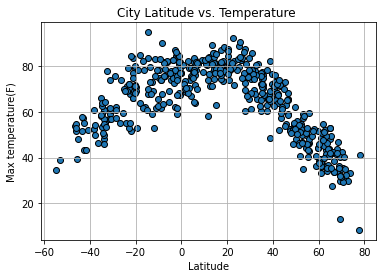

In [23]:
plt.scatter(cityDatadf['Lat'],cityDatadf['Max Temp'],marker='o',edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')

plt.title('City Latitude vs. Temperature ')

plt.grid(True)

plt.savefig('../output_data/1 Latitude Vs Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

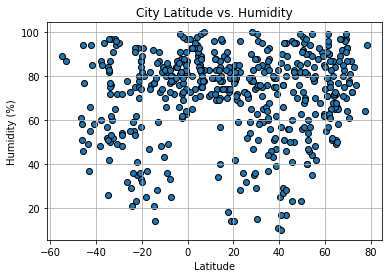

In [24]:
plt.scatter(
    cityDatadf['Lat'], 
    cityDatadf['Humidity'],
    marker="o",  
    edgecolors="black")

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig('../output_data/2 Latitude Vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

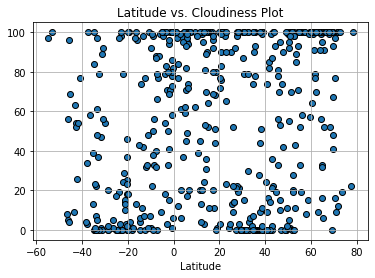

In [25]:
plt.scatter(cityDatadf["Lat"],cityDatadf["Cloudiness"],edgecolor="black")
plt.grid(True)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.savefig('../output_data/3 Latitude Vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

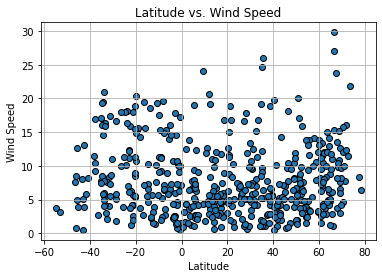

In [26]:
plt.scatter(cityDatadf["Lat"],cityDatadf["Wind Speed"],edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../output_data/4 Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [27]:
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
#Create Northern and Southern Hemisphere DataFrames for Latitude
northern_df = cityDatadf.loc[cityDatadf["Lat"] >=0]
southern_df = cityDatadf.loc[cityDatadf["Lat"] <0]

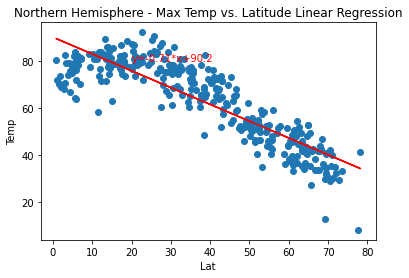

The r-squared is: 0.7576040159147155 which shows Lat and Temperature are correlated


In [29]:
plt.scatter(northern_df["Lat"],northern_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Max Temp"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(20,80),color="red")
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are not correlated')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

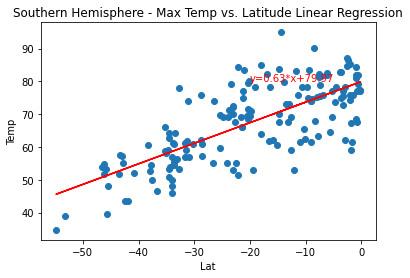

The r-squared is: 0.5387214340654989 which shows Lat and Temperature are correlated


In [30]:
plt.scatter(southern_df["Lat"],southern_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Max Temp"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-20,80),color="red")
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are not correlated')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

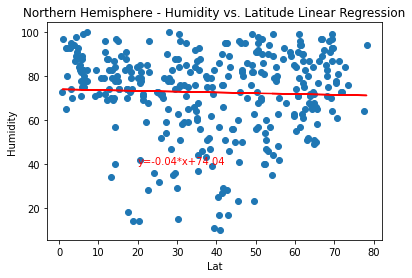

The r-squared is: 0.0015172979493893906 which shows Lat and Humidity are not correlated


In [31]:
plt.scatter(northern_df["Lat"],northern_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Humidity"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(20,40),color="red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are not correlated')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

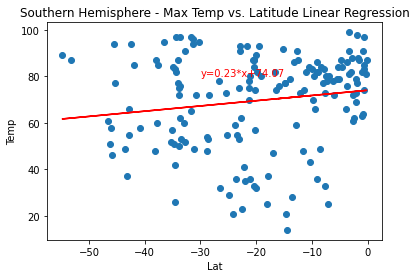

The r-squared is: 0.023715971377581194 which shows Lat and Humidity are not correlated


In [32]:
plt.scatter(southern_df["Lat"],southern_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Humidity"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-30,80),color="red")
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are not correlated')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

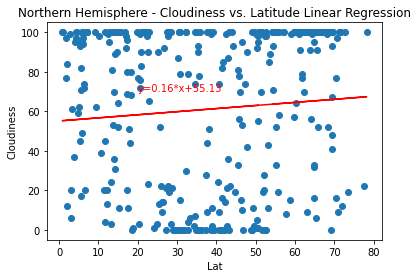

The r-squared is: 0.006587408882178831 which shows Lat and Cloudiness are not correlated


In [33]:
plt.scatter(northern_df["Lat"],northern_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Cloudiness"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(20,70),color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are not correlated')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

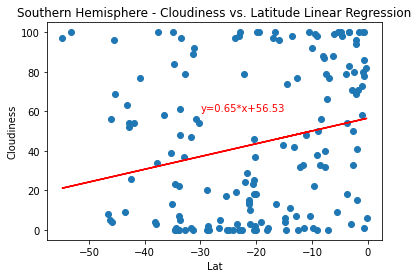

The r-squared is: 0.0554355454044325 which shows Lat and Cloudiness are not correlated


In [34]:
plt.scatter(southern_df["Lat"],southern_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Cloudiness"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-30,60),color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are not correlated')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

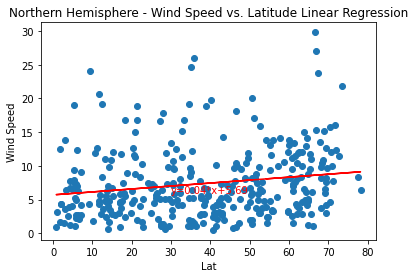

The r-squared is: 0.031609791367745776 which shows Lat and Wind Speed are not correlated


In [35]:
plt.scatter(northern_df["Lat"],northern_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Wind Speed"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(30,6),color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are not correlated')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

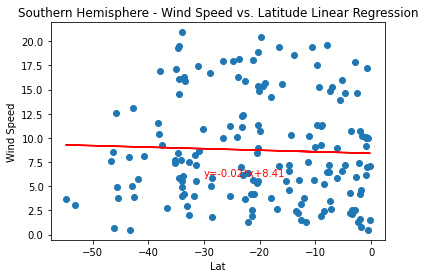

The r-squared is: 0.001612666890841556 which shows Lat and Wind Speed are not correlated


In [36]:
plt.scatter(southern_df["Lat"],southern_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Wind Speed"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-30,6),color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are not correlated')